# MaterialsCoord benchmarking – ternary materials scores

Benchmark and plot the results of the near neighbor algorithms on ternary structures.

*Written using:*
- MaterialsCoord==0.1.0

*Authors: Hillary Pan, Alex Ganose (10/12/19)*

---

First, lets initialize the near neighbor methods we are interested in.

In [1]:
from pymatgen.analysis.local_env import BrunnerNN_reciprocal, EconNN, JmolNN, \
                                        MinimumDistanceNN, MinimumOKeeffeNN, MinimumVIRENN, \
                                        VoronoiNN, CrystalNN

nn_methods = [
    MinimumDistanceNN(),  MinimumOKeeffeNN(), MinimumVIRENN(), JmolNN(), 
    EconNN(), BrunnerNN_reciprocal(), VoronoiNN(tol=0.5), CrystalNN()
]

Next, import the benchmark and choose the elemental structure set.

In [2]:
from materialscoord.core import Benchmark

structure_groups = ["A2BX4", "ABX3", "ABX4"]

bm = Benchmark.from_structure_group(structure_groups)

Calculate the benchmark scores for each algorithm for the cation sites.

In [3]:
cation_scores = bm.score(nn_methods, site_type="cation")
cation_scores

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3565: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3380: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "


,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,JmolNN,EconNN,BrunnerNN_reciprocal,VoronoiNN,CrystalNN
AlAsO4_33254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BAsO4_highcristobalite_26891,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BaAl2O4_21080,0.000000,3.666667,0.000000,5.000000,6.000000,0.000000,0.000000,0.000000
BaTiO3_67520,0.500000,17.500000,0.500000,6.000000,7.000000,0.000000,0.000000,0.000000
BaZnF4_182604,2.500000,9.000000,2.500000,5.500000,4.500000,1.500000,1.000000,0.000000
Be2SiO4_phenakite_64942,0.000000,0.000000,0.000000,2.666667,0.000000,0.000000,0.000000,0.000000
CaB2O4_34641,0.666667,2.000000,0.666667,2.666667,2.000000,0.000000,0.000000,0.000000
CaCO3_aragonite_15194,0.000000,3.500000,0.000000,4.500000,3.000000,3.000000,0.000000,0.000000
CaCO3_calcite_18164,0.000000,0.000000,0.000000,3.000000,6.000000,0.000000,0.000000,0.000000
CaFe2O4_166080,0.000000,5.000000,0.000000,7.000000,4.000000,0.000000,0.000000,0.000000


Plot the cation results.

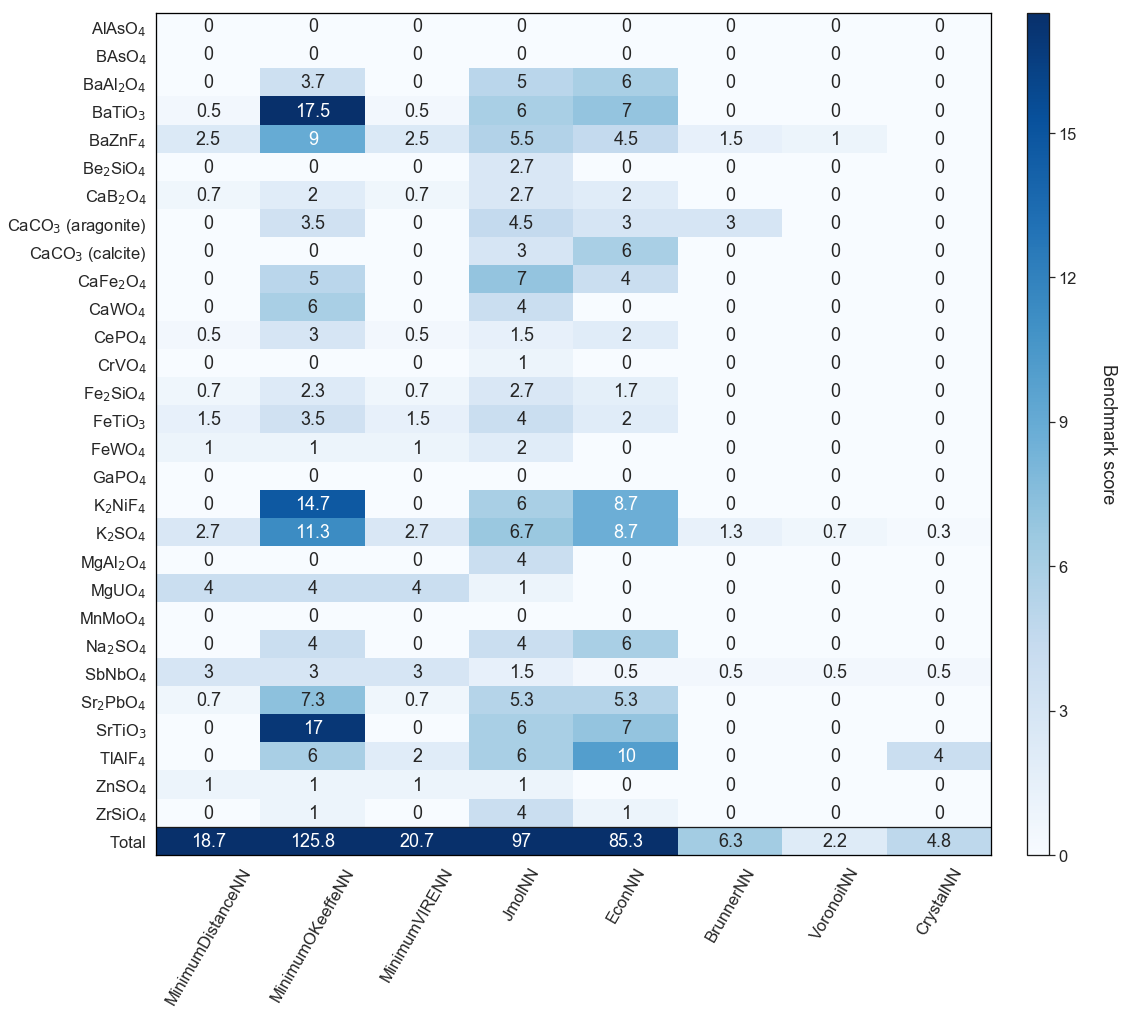

In [10]:
from pathlib import Path

from materialscoord import structure_mapping
from materialscoord.plot import plot_benchmark_scores

nn_method_mapping = {"BrunnerNN_reciprocal": "BrunnerNN"}

plt = plot_benchmark_scores(
    cation_scores, 
    structure_mapping=structure_mapping,
    nn_method_mapping=nn_method_mapping
)
 
plt.savefig(Path("plots", "ternary-cation.pdf"), bbox_inches='tight')
plt.show()

Calculate the benchmark scores for each algorithm for the anion sites.

In [12]:
anion_scores = bm.score(nn_methods, site_type="anion")
anion_scores

,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,JmolNN,EconNN,BrunnerNN_reciprocal,VoronoiNN,CrystalNN
AlAsO4_33254,0.500000,1.50,0.500000,0.50,0.500,0.50,0.500000,0.500000
BAsO4_highcristobalite_26891,1.000000,1.00,2.000000,0.00,0.000,0.00,0.000000,0.000000
BaAl2O4_21080,2.250000,2.25,0.750000,2.25,2.250,2.25,2.250000,2.250000
BaTiO3_67520,4.333333,3.00,0.333333,4.00,8.000,4.00,2.666667,2.666667
BaZnF4_182604,2.750000,0.50,0.750000,2.75,5.000,2.75,2.250000,1.500000
Be2SiO4_phenakite_64942,0.000000,2.00,0.000000,2.00,0.000,0.00,0.000000,0.000000
CaB2O4_34641,3.500000,3.50,3.500000,3.50,3.500,3.50,3.000000,3.500000
CaCO3_aragonite_15194,3.000000,3.00,4.000000,3.00,3.000,3.00,3.000000,3.000000
CaCO3_calcite_18164,2.000000,2.00,2.000000,2.00,2.000,2.00,0.000000,0.000000
CaFe2O4_166080,2.000000,0.50,0.000000,0.75,8.000,2.00,0.000000,0.000000


Plot the anion results.

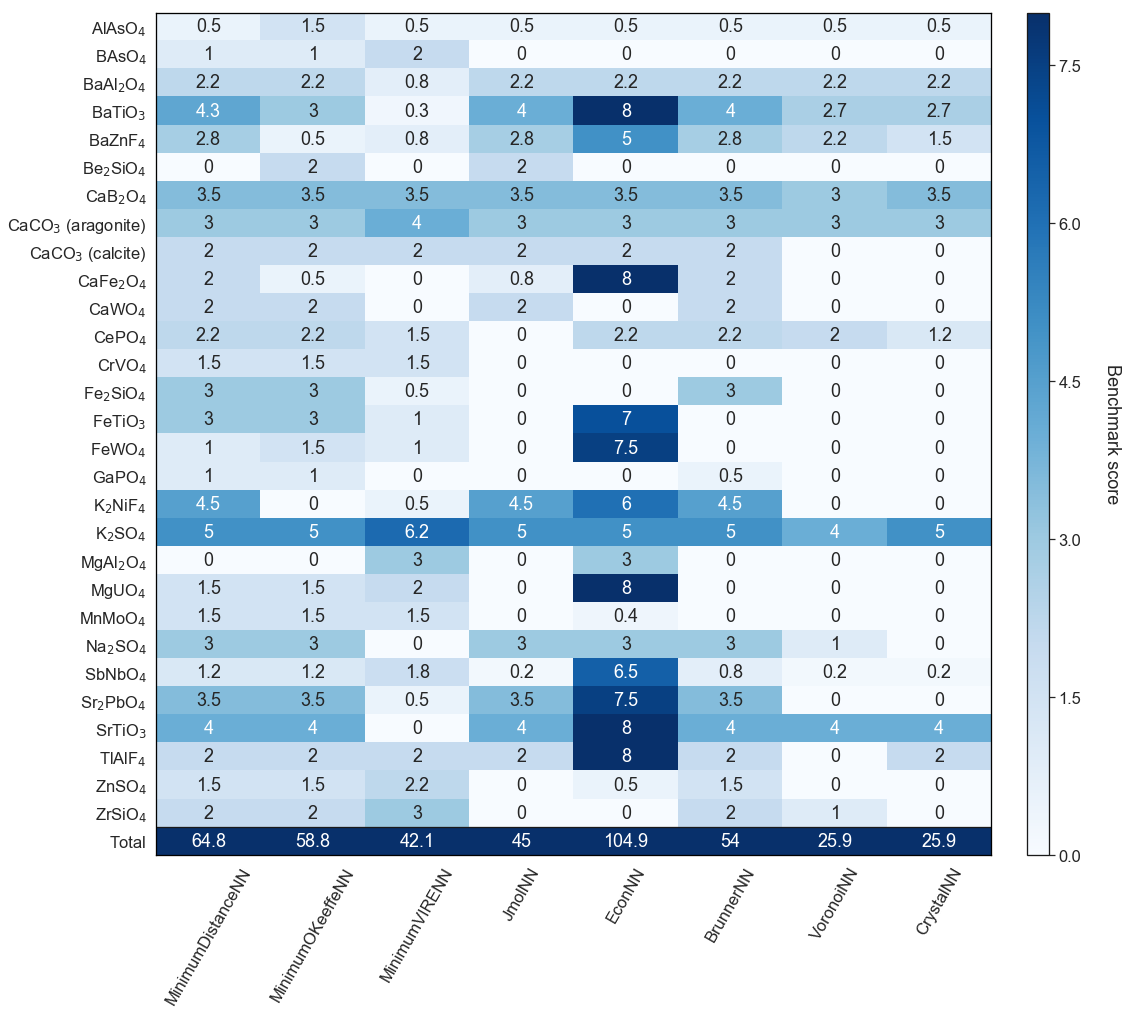

In [13]:
plt = plot_benchmark_scores(
    anion_scores, 
    structure_mapping=structure_mapping,
    nn_method_mapping=nn_method_mapping
)

plt.savefig(Path("plots", "ternary-anion.pdf"), bbox_inches='tight')
plt.show()